In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzip the dataset
!unzip '/content/drive/MyDrive/ZSClassification/ZeroShotHandwrittenCharacterRecognition/Bangla/BanglaCharacterDataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Train/201/bcc000060.bmp  
  inflating: Dataset/Train/201/bcc000061.bmp  
  inflating: Dataset/Train/201/bcc000062.bmp  
  inflating: Dataset/Train/201/bcc000063.bmp  
  inflating: Dataset/Train/201/bcc000064.bmp  
  inflating: Dataset/Train/201/bcc000065.bmp  
  inflating: Dataset/Train/201/bcc000066.bmp  
  inflating: Dataset/Train/201/bcc000067.bmp  
  inflating: Dataset/Train/201/bcc000068.bmp  
  inflating: Dataset/Train/201/bcc000069.bmp  
  inflating: Dataset/Train/201/bcc000070.bmp  
  inflating: Dataset/Train/201/bcc000071.bmp  
  inflating: Dataset/Train/201/bcc000072.bmp  
  inflating: Dataset/Train/201/bcc000073.bmp  
  inflating: Dataset/Train/201/bcc000074.bmp  
  inflating: Dataset/Train/201/bcc000075.bmp  
  inflating: Dataset/Train/201/bcc000076.bmp  
  inflating: Dataset/Train/201/bcc000077.bmp  
  inflating: Dataset/Train/201/bcc000078.bmp  
  inflating: Dataset/Train/201/bcc000079.bmp  
  inflati

In [ ]:
import glob

paths = glob.glob('/content/Dataset/*/*/*.bmp')
paths

['/content/Dataset/Test/181/bcc000049.bmp',
 '/content/Dataset/Test/181/bcc000006.bmp',
 '/content/Dataset/Test/181/bcc000040.bmp',
 '/content/Dataset/Test/181/bcc000051.bmp',
 '/content/Dataset/Test/181/bcc000055.bmp',
 '/content/Dataset/Test/181/bcc000039.bmp',
 '/content/Dataset/Test/181/bcc000015.bmp',
 '/content/Dataset/Test/181/bcc000023.bmp',
 '/content/Dataset/Test/181/bcc000047.bmp',
 '/content/Dataset/Test/181/bcc000050.bmp',
 '/content/Dataset/Test/181/bcc000053.bmp',
 '/content/Dataset/Test/181/bcc000024.bmp',
 '/content/Dataset/Test/181/bcc000001.bmp',
 '/content/Dataset/Test/181/bcc000041.bmp',
 '/content/Dataset/Test/181/bcc000029.bmp',
 '/content/Dataset/Test/181/bcc000048.bmp',
 '/content/Dataset/Test/181/bcc000036.bmp',
 '/content/Dataset/Test/181/bcc000014.bmp',
 '/content/Dataset/Test/181/bcc000037.bmp',
 '/content/Dataset/Test/181/bcc000003.bmp',
 '/content/Dataset/Test/181/bcc000010.bmp',
 '/content/Dataset/Test/181/bcc000019.bmp',
 '/content/Dataset/Test/181/bcc0

In [ ]:
import pandas as pd

df = pd.DataFrame({'Path': paths})
df

,Path
0,/content/Dataset/Test/181/bcc000049.bmp
1,/content/Dataset/Test/181/bcc000006.bmp
2,/content/Dataset/Test/181/bcc000040.bmp
3,/content/Dataset/Test/181/bcc000051.bmp
4,/content/Dataset/Test/181/bcc000055.bmp
...,...
14995,/content/Dataset/Train/185/bcc000176.bmp
14996,/content/Dataset/Train/185/bcc000084.bmp
14997,/content/Dataset/Train/185/bcc000087.bmp
14998,/content/Dataset/Train/185/bcc000079.bmp


In [ ]:
def extract_label(path):
    return path.split('/')[-2]

def extract_set(path):
    return path.split('/')[-3]

In [ ]:
df['Label'] = df['Path'].apply(extract_label)
df

,Path,Label
0,/content/Dataset/Test/181/bcc000049.bmp,181
1,/content/Dataset/Test/181/bcc000006.bmp,181
2,/content/Dataset/Test/181/bcc000040.bmp,181
3,/content/Dataset/Test/181/bcc000051.bmp,181
4,/content/Dataset/Test/181/bcc000055.bmp,181
...,...,...
14995,/content/Dataset/Train/185/bcc000176.bmp,185
14996,/content/Dataset/Train/185/bcc000084.bmp,185
14997,/content/Dataset/Train/185/bcc000087.bmp,185
14998,/content/Dataset/Train/185/bcc000079.bmp,185


In [ ]:
df = pd.concat([df, pd.get_dummies(df['Label'])], axis = 1)
df

,Path,Label,172,173,174,175,176,177,178,179,...,212,213,214,215,216,217,218,219,220,221
0,/content/Dataset/Test/181/bcc000049.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,/content/Dataset/Test/181/bcc000006.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,/content/Dataset/Test/181/bcc000040.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,/content/Dataset/Test/181/bcc000051.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,/content/Dataset/Test/181/bcc000055.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,/content/Dataset/Train/185/bcc000176.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,/content/Dataset/Train/185/bcc000084.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,/content/Dataset/Train/185/bcc000087.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,/content/Dataset/Train/185/bcc000079.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['Set'] = df['Path'].apply(extract_set)
df

,Path,Label,172,173,174,175,176,177,178,179,...,213,214,215,216,217,218,219,220,221,Set
0,/content/Dataset/Test/181/bcc000049.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Test
1,/content/Dataset/Test/181/bcc000006.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Test
2,/content/Dataset/Test/181/bcc000040.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Test
3,/content/Dataset/Test/181/bcc000051.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Test
4,/content/Dataset/Test/181/bcc000055.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,/content/Dataset/Train/185/bcc000176.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Train
14996,/content/Dataset/Train/185/bcc000084.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Train
14997,/content/Dataset/Train/185/bcc000087.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Train
14998,/content/Dataset/Train/185/bcc000079.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Train


In [ ]:
train_df = df.loc[df['Set'] == 'Train'].iloc[:, :-1]
test_df = df.loc[df['Set'] == 'Test'].iloc[:, :-1]

In [ ]:
df

,Path,Label,172,173,174,175,176,177,178,179,...,213,214,215,216,217,218,219,220,221,Set
0,/content/Dataset/Test/181/bcc000049.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Test
1,/content/Dataset/Test/181/bcc000006.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Test
2,/content/Dataset/Test/181/bcc000040.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Test
3,/content/Dataset/Test/181/bcc000051.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Test
4,/content/Dataset/Test/181/bcc000055.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,/content/Dataset/Train/185/bcc000176.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Train
14996,/content/Dataset/Train/185/bcc000084.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Train
14997,/content/Dataset/Train/185/bcc000087.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Train
14998,/content/Dataset/Train/185/bcc000079.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Train


In [ ]:
train_df

,Path,Label,172,173,174,175,176,177,178,179,...,212,213,214,215,216,217,218,219,220,221
3000,/content/Dataset/Train/181/bcc000169.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3001,/content/Dataset/Train/181/bcc000180.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3002,/content/Dataset/Train/181/bcc000198.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3003,/content/Dataset/Train/181/bcc000216.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3004,/content/Dataset/Train/181/bcc000185.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,/content/Dataset/Train/185/bcc000176.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,/content/Dataset/Train/185/bcc000084.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,/content/Dataset/Train/185/bcc000087.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,/content/Dataset/Train/185/bcc000079.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df

,Path,Label,172,173,174,175,176,177,178,179,...,212,213,214,215,216,217,218,219,220,221
0,/content/Dataset/Test/181/bcc000049.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,/content/Dataset/Test/181/bcc000006.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,/content/Dataset/Test/181/bcc000040.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,/content/Dataset/Test/181/bcc000051.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,/content/Dataset/Test/181/bcc000055.bmp,181,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,/content/Dataset/Test/185/bcc000032.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,/content/Dataset/Test/185/bcc000042.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,/content/Dataset/Test/185/bcc000020.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,/content/Dataset/Test/185/bcc000011.bmp,185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(65, 81, 3)


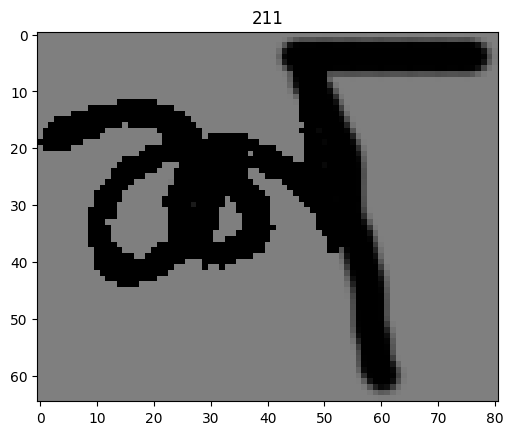

In [ ]:
import matplotlib.pyplot as plt
import random

def imshow():
    idx = random.randint(0, len(train_df))
    img = plt.imread(train_df['Path'][idx])
    label = train_df['Label'][idx]
    print(img.shape)
    plt.imshow(img)
    plt.title(label)
    plt.show()

imshow()

In [ ]:
import torch
import cv2

class CustomDatasetLoader(torch.utils.data.Dataset):
    
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        path = self.df.iloc[idx, 0]
        img = cv2.imread(path)
        
        if self.transform:
            img = self.transform(img)
        
        label = torch.from_numpy(self.df.iloc[idx, 2:].values.astype(float))

        return (img, label)

In [ ]:
import torchvision

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize(((32,32))),
    torchvision.transforms.ToTensor(),
])

In [ ]:
train_data = CustomDatasetLoader(df = train_df, transform = transform)
test_data = CustomDatasetLoader(df = test_df, transform = transform)
all_data = CustomDatasetLoader(df = df.iloc[:, :-1], transform = transform)

In [ ]:
train_data.__len__(), test_data.__len__(), all_data.__len__()

(12000, 3000, 15000)

In [ ]:
img, label = train_data.__getitem__(0)

In [ ]:
img.shape, img

(torch.Size([3, 32, 32]),
 tensor([[[0.4980, 0.4980, 0.4980,  ..., 0.4980, 0.4980, 0.4980],
          [0.4980, 0.4980, 0.4980,  ..., 0.4902, 0.4980, 0.4980],
          [0.4980, 0.4980, 0.4980,  ..., 0.3686, 0.4980, 0.4980],
          ...,
          [0.4980, 0.4980, 0.4980,  ..., 0.1490, 0.4784, 0.4980],
          [0.4980, 0.4980, 0.4980,  ..., 0.4314, 0.4980, 0.4980],
          [0.4980, 0.4980, 0.4980,  ..., 0.4980, 0.4980, 0.4980]],
 
         [[0.4980, 0.4980, 0.4980,  ..., 0.4980, 0.4980, 0.4980],
          [0.4980, 0.4980, 0.4980,  ..., 0.4902, 0.4980, 0.4980],
          [0.4980, 0.4980, 0.4980,  ..., 0.3686, 0.4980, 0.4980],
          ...,
          [0.4980, 0.4980, 0.4980,  ..., 0.1490, 0.4784, 0.4980],
          [0.4980, 0.4980, 0.4980,  ..., 0.4314, 0.4980, 0.4980],
          [0.4980, 0.4980, 0.4980,  ..., 0.4980, 0.4980, 0.4980]],
 
         [[0.4980, 0.4980, 0.4980,  ..., 0.4980, 0.4980, 0.4980],
          [0.4980, 0.4980, 0.4980,  ..., 0.4902, 0.4980, 0.4980],
          [0.4

In [ ]:
label.shape, label

(torch.Size([50]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        dtype=torch.float64))

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset = train_data, batch_size = 32, shuffle = True, num_workers = 1, drop_last = True
)
test_loader = torch.utils.data.DataLoader(
    dataset = test_data, batch_size = 64, shuffle = True, num_workers = 1, drop_last = False
)
all_data_loader = torch.utils.data.DataLoader(
    dataset = all_data, batch_size = 64, shuffle = True, num_workers = 1, drop_last = False
)

In [ ]:
for (images, labels) in all_data_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([64, 3, 32, 32])
torch.Size([64, 50])
